In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Step 2: Load dataset
df = pd.read_csv(r'C:\Users\shash\Downloads\dataset.csv')
print(df.head())
print(df.info())


   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 en

In [4]:
# Step 3: Handle missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)


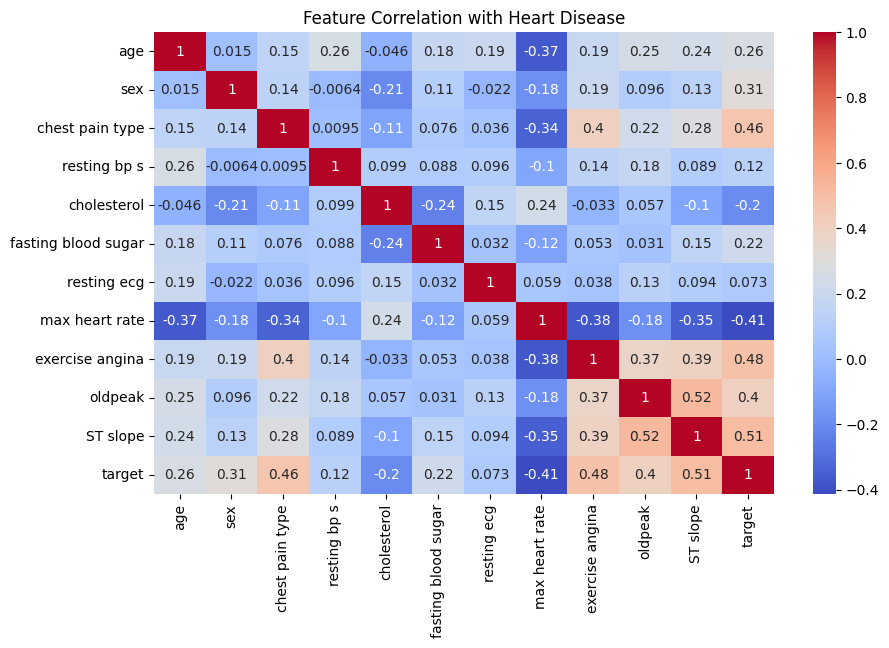

In [5]:
# Step 4: Check correlation (optional EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Heart Disease")
plt.show()


In [7]:
# Step 5: Feature and Target Split
X = df.drop('target', axis=1)
y = df['target']

# Feature Scaling (important for models like SVM, Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
# Step 7: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# Step 8: Evaluate the Model
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[103   9]
 [  8 118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       112
           1       0.93      0.94      0.93       126

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



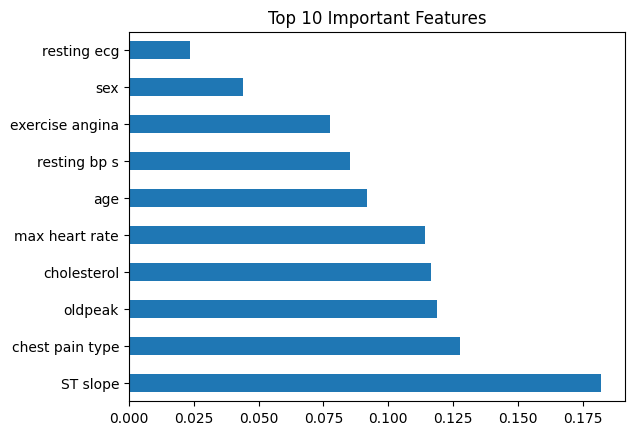

In [11]:
# Step 9: Feature Importance (Top Predictors)
importances = pd.Series(model.feature_importances_, index=df.columns[:-1])
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()
